# Contour plots in Python with `matplotlib`: Easy as X-Y-Z

When I have continuous data in three dimensions, my first visaulization inclination is to generate a contour plot. While 3-D surface plots might be useful in [some special cases](https://www.visualisingdata.com/2015/03/when-3d-works/), in general I think they should be avoided since they [add a great deal of complexity](https://www.gabrielaplucinska.com/blog/2017/8/7/3d-graphs) to a visualization without adding much (if any) information beyond a 2-D contour plot. 

While I usually use R/ggplot2 to generate my data visualizations, I found the support for good-looking, out-of-the-box contour plots to be a bit lacking. Of course, you can make anything look great with enough effort, but you can also waste an excessive amount of time fiddling with customizable tools. 

This isn't to say the Pythonic contour plot doesn't come with its own set of frustrations, but hopefully this post will make the task easier for any of you going down this road.
**The most difficult part of using the Python/`matplotlib` implementation of contour plots is formatting your data.** The main plotting function we'll use, `ax.contour(X,Y,Z)`, requires that your three-dimensional input data be in an odd and unintuitive structure. In this post, I'll give you the code to get from a more traditional data structure to this Python-specific format.

## Data preparation

To begin, I'll start with some dummy data that is in a standard "long" format, where each row corresponds to a single observation. In this case, my three dimensions are just `x`, `y`, and `z` which maps directly to the axes on which we wish to plot them. 

In [1]:
import pandas as pd
import numpy as np
data_url = 'https://raw.githubusercontent.com/alexmill/website_notebooks/master/data/data_3d_contour.csv'
contour_data = pd.read_csv(data_url)
contour_data.head()

,x,y,z
0,0.000000,0.0,0.392
1,0.198970,0.0,0.496
2,0.349485,0.0,0.500
3,0.500000,0.0,0.500
4,0.698970,0.0,0.500


*Nota bene:* For best results, make sure that there is a row for every combination of `x` and `y` coordinates in the plane of the range you want to plot. (Said differently, if $X$ is the set of points you want to plot on the $x$-axis and $Y$ is the set of points you want to plot on the $y$-axis, then your dataframe should contain a $z$-value for every point in the Cartesian product of $X \times Y$.) If you know you're going to be making a contour plot, you can plat ahead of time so your data-generating process results in this format. It's not detrimental if your data don't meet this requirement, but you may get unwanted blank spots in your plot if your data is missing any points in the plane.

Assuming your data are in a similar format, you can quickly convert it to the requisite structure for `matplotlib` using the code below. 

In [2]:
import numpy as np

Z = contour_data.pivot_table(index='x', columns='y', values='z').T.values

X_unique = np.sort(contour_data.x.unique())
Y_unique = np.sort(contour_data.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

What's going on here? Looking at the `Z` data first, I've merely used the `pivot_table` method from `pandas` to cast my data into a matrix format, where the columns/rows correspond to the values of `Z` for each of the points in the range of the $x$/$y$-axes. We can see the resulting data structure below:

In [3]:
pd.DataFrame(Z).round(3)

,0,1,2,3,4,5,6
0,0.392,0.496,0.500,0.500,0.500,0.500,0.500
1,0.286,0.472,0.494,0.500,0.500,0.500,0.500
2,0.094,0.304,0.434,0.496,0.500,0.500,0.500
3,-0.036,0.118,0.308,0.460,0.500,0.500,0.500
4,-0.052,-0.042,0.120,0.328,0.480,0.500,0.500
5,-0.212,-0.192,-0.120,0.004,0.266,0.438,0.496
6,-0.320,-0.362,-0.348,-0.352,-0.304,-0.247,-0.145
7,-0.328,-0.414,-0.454,-0.460,-0.478,-0.474,-0.490


This by itself is not terribly unintuitive, but the odd part about `matplotlib`'s `contour` method is that it also requires your `X` and `Y` data to have the exact same shape as your `Z` data. This means that we need to *duplicate* our $x$ and $y$ values along different axes, so that each entry in `Z` has its corresponding $x$ and $y$ coordinates in the same entry of the `X` and `Y` matrices. Fortunately, the `meshgrid` method from `numpy` will do this automatically for us.

To help you visualize exacctly what `meshgrid` is doing, first notice the unique values in each of my x/y axes:

In [4]:
X_unique,Y_unique

(array([0.      , 0.19897 , 0.349485, 0.5     , 0.69897 , 0.849485,
        1.      ]),
 array([0.        , 0.26315789, 0.52631579, 0.63157895, 0.73684211,
        0.84210526, 0.94736842, 1.        ]))

And now let's display the matrices `X` and `Y` generated by `np.meshgrid(X_unique, Y_unique)`:

In [5]:
pd.DataFrame(X).round(3)

,0,1,2,3,4,5,6
0,0.0,0.199,0.349,0.5,0.699,0.849,1.0
1,0.0,0.199,0.349,0.5,0.699,0.849,1.0
2,0.0,0.199,0.349,0.5,0.699,0.849,1.0
3,0.0,0.199,0.349,0.5,0.699,0.849,1.0
4,0.0,0.199,0.349,0.5,0.699,0.849,1.0
5,0.0,0.199,0.349,0.5,0.699,0.849,1.0
6,0.0,0.199,0.349,0.5,0.699,0.849,1.0
7,0.0,0.199,0.349,0.5,0.699,0.849,1.0


In [6]:
pd.DataFrame(Y).round(3)

,0,1,2,3,4,5,6
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.263,0.263,0.263,0.263,0.263,0.263,0.263
2,0.526,0.526,0.526,0.526,0.526,0.526,0.526
3,0.632,0.632,0.632,0.632,0.632,0.632,0.632
4,0.737,0.737,0.737,0.737,0.737,0.737,0.737
5,0.842,0.842,0.842,0.842,0.842,0.842,0.842
6,0.947,0.947,0.947,0.947,0.947,0.947,0.947
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000


I'm not a huge fan of this formatting requirement since we have to duplicate a bunch of data, but hopefully I've helped you understand the basic process required to get here from a more standard "long" data format.

### `matplotlib`'s default contour plot 

Now that my data is in the correct format for `matplotlib` to understand, I can generate my first pass at a contour plot:

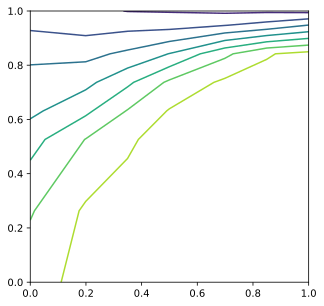

In [7]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.contour(X, Y, Z)

As you can see, there's nothing too impressive about the default look of this plot. However, with just a few extra lines of code, we can significantly improve the aesthetics of this base visualization. 

### Customizing your contour

My primary customizations will be:
- Select custom break points for the contour levels
- Fill in the background with color to indicate level changes
- Change the contour lines to black

Here, I'll use `matplotlib`'s `colormap` module to generate a color pallette ([check out this handy reference](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html) for a full list of `matplotlib`'s default color pallettes).

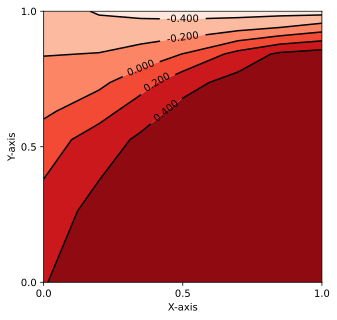

In [8]:
# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([-0.4,-0.2,0,0.2,0.4])

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Z, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
ax.set_xlabel('X-axis')
_ = ax.set_ylabel('Y-axis')
#plt.savefig('figure.pdf') # uncomment to save vector/high-res version

You can obviously experiment with a lot more here, but this is already a significant improvement. I especially like how easy it is to plot the value of each level directly on the line. This obviates the need for a separate legend for the $z$-axis---just make sure you have a good title so people know what the z-axis represents!

### Addendum: comparison with R/ggplot2

Just for good measure, I'll show you what I was able to come up with exerting a similar amount of effort in R using just `ggplot2`. (If you are determined to use R, I'd suggest checking out the [`metR`](https://github.com/eliocamp/metR) package which I found has better support for good-looking contour plots.)

In [9]:
%reload_ext rpy2.ipython

C:\Users\iowahawk89\miniconda3\envs\ds_tensorflow\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [10]:
%%R -i contour_data,levels -w 5 -h 4 -u in -r 200
library(ggplot2)

plt = ggplot(contour_data, aes(x=x, y=y, z=z)) + 
    stat_contour(aes(color=..level..), breaks=levels, size=1) +
    scale_x_continuous(name='X-axis', limits=c(0,1.01), breaks=c(0,0.5,1)) +
    scale_y_continuous(name='Y-axis', limits=c(0,1), breaks=c(0,0.5,1)) +
    scale_colour_gradient(low='#2E38B5', high='#B54648') +
    theme_bw()
print(plt)

AttributeError: type object 'DataFrame' has no attribute 'from_items'